In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting

In the previous notebook, we saw how combining a bunch of simple models can create a powerful overall model. Each model on its own might make poor predictions, but together they can perform exceptionally well. In Random Forests, the trees work in parallel, with each tree independent of the others. **Gradient Boosting**, however, takes a different approach: it builds trees in sequence, where each new tree learns from and tries to improve on the predictions of the previous one.

### Gradient Boosting from "scratch"

We’ll start by building a simple Gradient Boosting model from scratch to illustrate the main idea.

In [4]:
from sklearn.tree import DecisionTreeRegressor

First, we'll generate a toy dataset for regression. Our goal is to predict the $y$ values from the $x$ values.

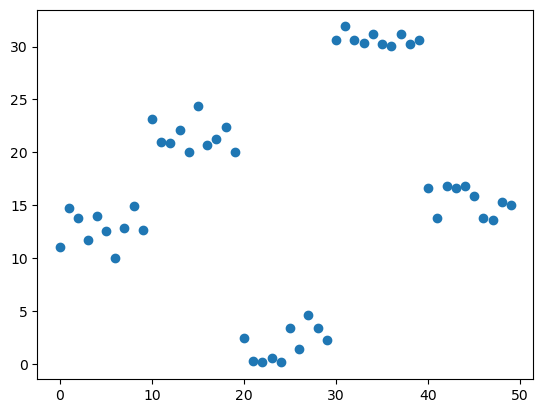

In [5]:
x = np.arange(0,50)

y1 = np.random.uniform(10,15,10) # samples from the uniform distribution on [10,15]
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
x = x.reshape(50,1)
plt.scatter(x,y)

r = y.copy() 

We'll begin by fitting a very simple Decision Tree model.

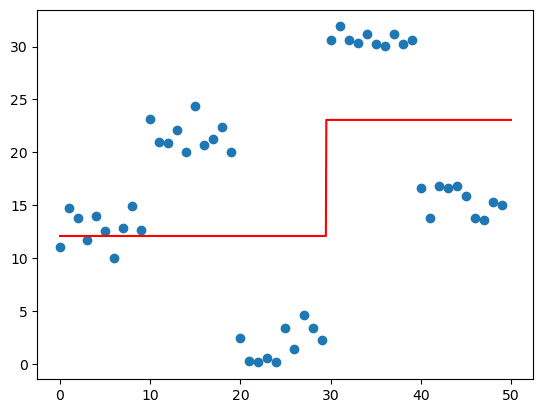

In [6]:
# initial tree
tree_reg = DecisionTreeRegressor(max_depth=1)
tree_reg.fit(x,y)
# prediction
y_pred = tree_reg.predict(x)

# plot initial tree
x_plot = np.linspace(0,50,1000).reshape(1000,1)
y_plot = tree_reg.predict(x_plot)

plt.scatter(x,y)
plt.plot(x_plot,y_plot,color='red')

As expected, the model doesn’t fit the data very well because it’s so simple

Here’s the idea: we’ll start by calculating the residuals (the errors—the difference between the actual and predicted values). We then train a new Decision Tree, but this one’s job is to predict the residuals from the first model, not the original target values.

In [7]:
# residuals
r = y-tree_reg.predict(x)
# next model
tree_reg = DecisionTreeRegressor(max_depth=1)
# fit tree on residuals of previous model
tree_reg.fit(x,r) 

DecisionTreeRegressor(max_depth=1)

The final prediction is the sum of the predictions from each tree. 

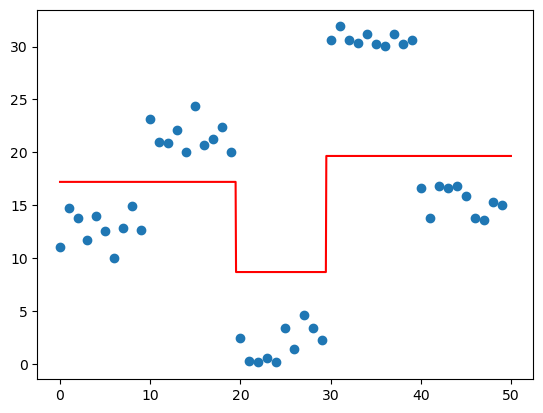

In [8]:
# Add the current tree's predictions to our "final" prediction
y_pred += tree_reg.predict(x)
y_plot += tree_reg.predict(x_plot)

# Plot the data points and the updated prediction line
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color='red')

Now, we repeat these steps: compute the residuals from the latest tree, then train a new tree on these residuals. Our final prediction is the sum of predictions from all the trees. Each new tree gradually boosts the model’s accuracy by correcting the errors made by the previous trees.

Run the cell below several times. Each time, you should see the model fitting the data better. Eventually, if you run it too many times, the model will start overfitting, capturing too much detail and noise in the data.

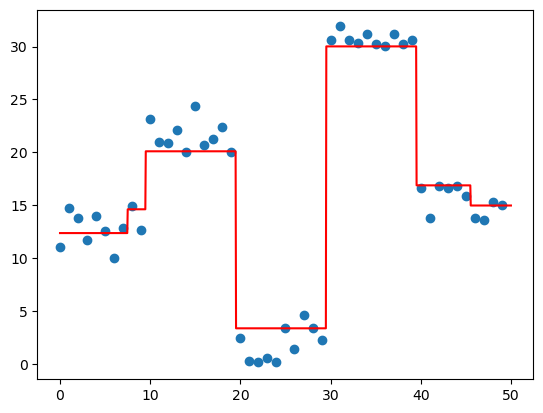

In [21]:
# Calculate residuals
r = r - tree_reg.predict(x)

# Initialize the next model
tree_reg = DecisionTreeRegressor(max_depth=1)

# Fit the tree on the residuals of the previous model
tree_reg.fit(x, r)

# Add the current tree's predictions to our "final" prediction
y_pred += tree_reg.predict(x)
y_plot += tree_reg.predict(x_plot)

# Plot the data points and the updated prediction line
plt.scatter(x, y)
plt.plot(x_plot, y_plot, color='red')

## Building a gradient boosting model in scikit-learn

Of course, we don’t need to build Gradient Boosting from scratch—Scikit-learn has a built-in Gradient Boosting implementation ready to use.

Let's train a Gradient Boosting model on a different regression toy dataset.
The data follows a general linear trend, but there are a few outliers. 
Outliers are points that don’t fit the overall pattern of the data-they’re unusually high or low compared to the other values. These points can make prediction harder, as they don’t follow the main trend.

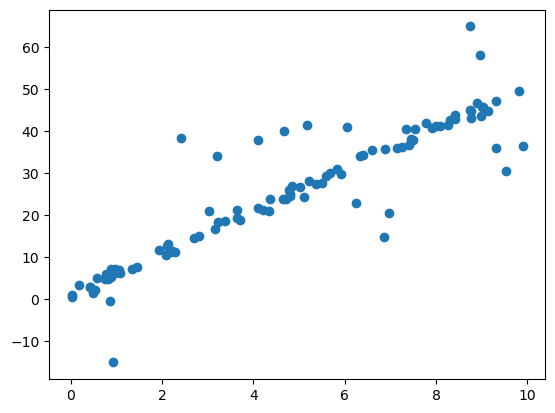

In [23]:
m = 100
x = np.random.uniform(0,10,m)
y = 5*x + 1 + 1*np.random.randn(m)
y[::5] += 50 * (0.5 - np.random.rand(20)) # add outliers
x = x.reshape(m,1)
plt.scatter(x,y)

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

"A Gradient Boosting model has two main hyperparameters:

- `n_estimators`: This is the number of trees in the model. More trees can improve accuracy, but too many may lead to overfitting.
- `learning_rate`: This controls how much each tree contributes to correcting the errors of the previous trees. A smaller learning rate makes each tree's impact smaller, requiring more trees but often resulting in a more stable model. In our previous example, we used a learning rate of 1.

In [31]:
gb_reg = GradientBoostingRegressor(n_estimators=50, #number of trees
                                   max_depth=1,
                                   learning_rate=1.) 

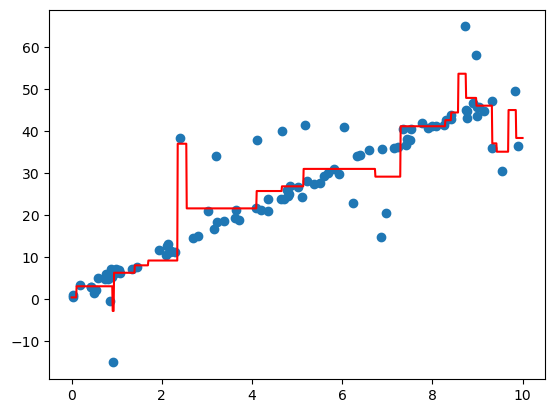

In [32]:
gb_reg.fit(x,y)
y_plot = gb_reg.predict(x_plot)
plt.scatter(x,y)
x_plot = np.linspace(0,10,1000).reshape(1000,1)
y_plot = gb_reg.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

The model is starting to overfit the data. Boosting models often overfit quickly, which is why the learning rate is important—it helps control this by slowing down learning.

**My rule of thumb:** As `n_estimators` (the number of trees) goes up, `learning_rate` should go down.

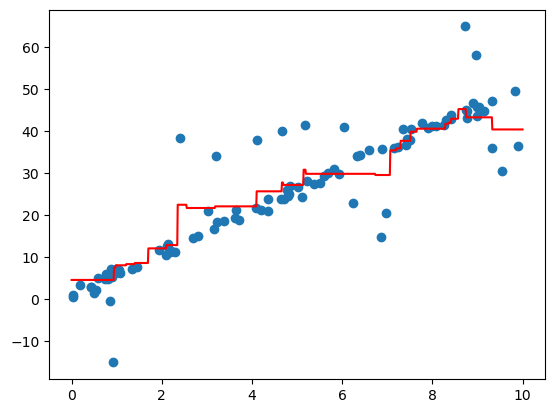

In [35]:
# learning rate < 1 slows down the convergence to zero residuals (it prevents overfitting)
gb_reg = GradientBoostingRegressor(n_estimators=50, #number of trees
                                   max_depth=2,
                                   learning_rate=0.05)
gb_reg.fit(x,y)
y_plot = gb_reg.predict(x_plot)
plt.scatter(x,y)
x_plot = np.linspace(0,10,1000).reshape(1000,1)
y_plot = gb_reg.predict(x_plot)
plt.plot(x_plot,y_plot,color='red')

In this plot, the model seems to fit the data more smoothly than before, with less overfitting. The step-like predictions still capture the general trend in the data, but they avoid getting too close to individual data points, especially the outliers.